# Bootstrap

__Goal__: illustrate the bootstrap and check that the distribution of entropies after resampling follows a normal distribution

In [1]:
import os
import sys

sys.path.insert(0, os.path.join(os.path.abspath(""), "..", ".."))

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from tqdm import tqdm

from infovar.stats import entropy_estimators as ee

# plt.rc("text", usetex=True)

## Introduction to bootstrapping

In [2]:
# TODO

## Degeneracy induced by bootstrapping

In [3]:
n = 10_000
iters = 10_000

# Empirical

counts_list = []
max_len = 0
for it in tqdm(range(iters)):
    x = np.random.choice(n, n, replace=True)
    c = np.bincount(np.bincount(x))
    counts_list.append(c)
    if c.size > max_len:
        max_len = c.size
        
for it, counts in enumerate(tqdm(counts_list)):
    counts_list[it] = np.pad(counts, (0, max_len - len(counts)), mode='constant')
    
counts = np.array(counts_list) # shape (iters, n)
freqs = counts / n

# Analytical

probs = np.array([binom.pmf(k, n, 1/n) for k in range(max_len)])

100%|██████████| 10000/10000 [00:00<00:00, 68159.61it/s]


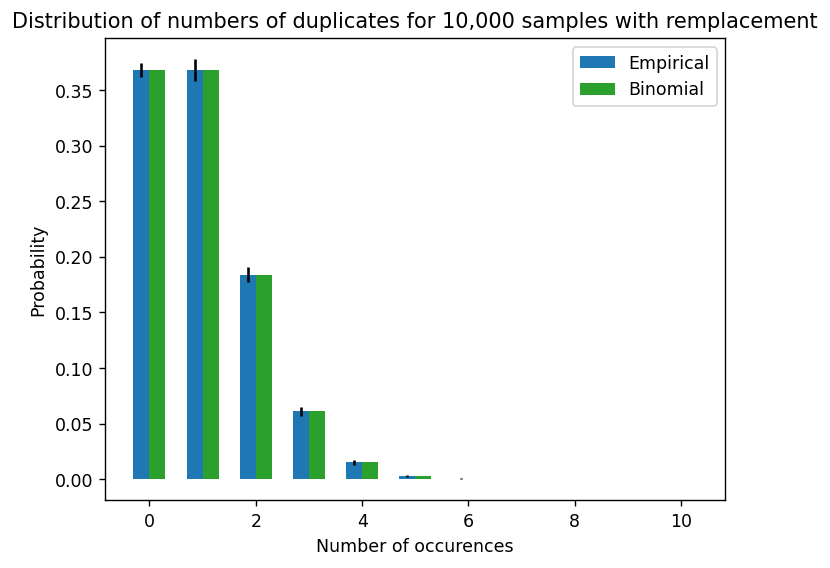

In [4]:
width = 0.3
stds = np.std(freqs, axis=0)

#

plt.figure(dpi=125)

plt.bar(np.arange(max_len) - width/2, np.mean(freqs, axis=0), yerr=2*stds, color='tab:blue', width=width, label='Empirical')
plt.bar(np.arange(max_len) + width/2, probs, color='tab:green', width=width, label='Binomial')

plt.xlabel("Number of occurences")
plt.ylabel("Probability")
plt.title(f"Distribution of numbers of duplicates for {n:,} samples with replacement")
plt.legend()

plt.show()

## Analytical example

In [5]:
n_samples = 10_000

sigma = 1
sigma_add = 1e-2

data = np.random.normal(0, sigma, n_samples)
data[:n_samples//2] = data[n_samples//2:]
data += np.random.normal(0, sigma_add, n_samples)
data = data.reshape(-1, 1)

h = ee.entropy(data)
href = 0.5 * np.log2(2*np.pi*np.e*sigma**2)
href2 = 0.5 * np.log2(2*np.pi*np.e*(sigma**2 + sigma_add**2))

In [6]:
h, href, href2

(2.0123997907720037, 2.047095585180641, 2.047167716326188)

## Data loading

In [7]:
param = 'dust-av'
line = 'c18o10'

x = astro30m.load_line_integral(line, 2020).data.reshape(-1, 1)
y = astro30m.load_phys_quantity(param, 2020).data.reshape(-1, 1)

x = np.log10(np.abs(x))
y = np.log10(np.abs(y))

n = x.shape[0]

NameError: name 'astro30m' is not defined

## Influence of additive Gaussian noise to prevent degeneracy during bootstrap

In [ ]:
stds = np.logspace(-8, 2, 50)

idx = np.random.choice(n, n, replace=True)
hs = np.zeros_like(stds)
for i, std in enumerate(tqdm(stds)):
    _x = x[idx] + np.random.normal(0, std, x.shape)
    _y = y[idx]
    hs[i] = centropy(_y, _x)

In [ ]:
plt.figure(figsize=(6.4, 0.8*4.8), dpi=125)

plt.semilogx(stds, hs, label=f'Kraskov estimate')

plt.xlabel('Additive Gaussian noise standard deviation')
plt.ylabel('Conditional differential entropy (bits)')
plt.title(f"Kraskov estimation of {astro30m.latex_quantity(param)} entropy vs. additive noise level")
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(6.4, 0.8*4.8), dpi=125)

grad = np.gradient(hs)

plt.semilogx(stds[:-1], grad[:-1], label=f'Gradient of kraskov estimate')

plt.xlabel('Additive Gaussian noise standard deviation')
plt.ylabel('Conditional differential entropy (bits)')
plt.title(f"Kraskov estimation of {astro30m.latex_quantity(param)} entropy vs. additive noise level")
plt.legend()

plt.show()

## True entropy

In [ ]:
noise_std = 5e-2 # To prevent degeneracy

_x = x + np.random.normal(0, noise_std, x.shape)
_y = y# + np.random.normal(0, noise_std, y.shape)

h = ee.centropy(_y, _x)

## Entropy after resampling

In [ ]:
iters = 200

hs = np.zeros(iters)
for i in tqdm(range(iters)):
    idx = np.random.choice(n, n, replace=True)
    _x = x[idx] + np.random.normal(0, noise_std, x.shape)
    _y = y[idx]# + np.random.normal(0, noise_std, y.shape)

    hs[i] = ee.centropy(_y, _x)

## Histograms

In [ ]:
mu = np.mean(hs)
sigma = np.std(hs)

In [ ]:
plt.figure(dpi=125)

plt.hist(hs, bins=iters//10, density=True, label='Bootstrap values')
plt.axvline(mu, color='orange', label='Bootstrap mean entropy')
plt.axvline(h, color='green', label='"True" entropy')
plt.xlabel("$h(Y|X)$")
plt.ylabel("Density")
plt.legend()

plt.show()

## Confidence interval

In [ ]:
print(f"h(Y|X): {h:.3f}")
print(f"mu: {mu:.3f}")
print(f"sigma: {sigma:.3f}")
print(f"CI (95%): [{h-2*sigma:.3f}, {h+2*sigma:.3f}]")

In [ ]:
%%timeit
centropy(_y, _x)

In [ ]:
%%timeit
mi(_y, _x)